In [4]:
from tensorflow import keras 
from keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization, Input

In [6]:
# %pip install --upgrade kagglehub
import kagglehub

# Download latest version
kaggle_path = kagglehub.dataset_download("devantltd/analysing-second-hand-car-sales-data")

path = kaggle_path + "/second_hand_car_sales.csv"
print("Path to dataset files:", path)

Path to dataset files: /Users/ajitesh/.cache/kagglehub/datasets/devantltd/analysing-second-hand-car-sales-data/versions/1/second_hand_car_sales.csv


In [14]:
import os
import pandas as pd

df = pd.read_csv(path)


print("Number of rows:", df.shape)
df.head()
df["Manufacturer"].unique()

#encode manufacturer to numerical values
df["Manufacturer"] = df["Manufacturer"].astype("category").cat.codes
df["Model"] = df["Model"].astype("category").cat.codes
df["Fuel Type"] = df["Fuel Type"].astype("category").cat.codes

#normalize Mileage and Price (£)
df["Mileage"] = (df["Mileage"] - df["Mileage"].min()) / (df["Mileage"].max() - df["Mileage"].min()) * 10
df["Price (£)"] = (df["Price (£)"] - df["Price (£)"].min()) / (df["Price (£)"].max() - df["Price (£)"].min()) *10
df["Year of Manufacture"] = (df["Year of Manufacture"] - df["Year of Manufacture"].min()) / (df["Year of Manufacture"].max() - df["Year of Manufacture"].min()) * 10

# df.head()




current_year = 2025
df['Car Age'] = current_year - df['Year of Manufacture']
df['Car Age']= (df['Car Age'] - df['Car Age'].min()) / (df['Car Age'].max() - df['Car Age'].min()) * 10
x_train = df.drop(columns=["Year of Manufacture", "Price (£)"])
y_train = df["Price (£)"]



Number of rows: (50000, 7)


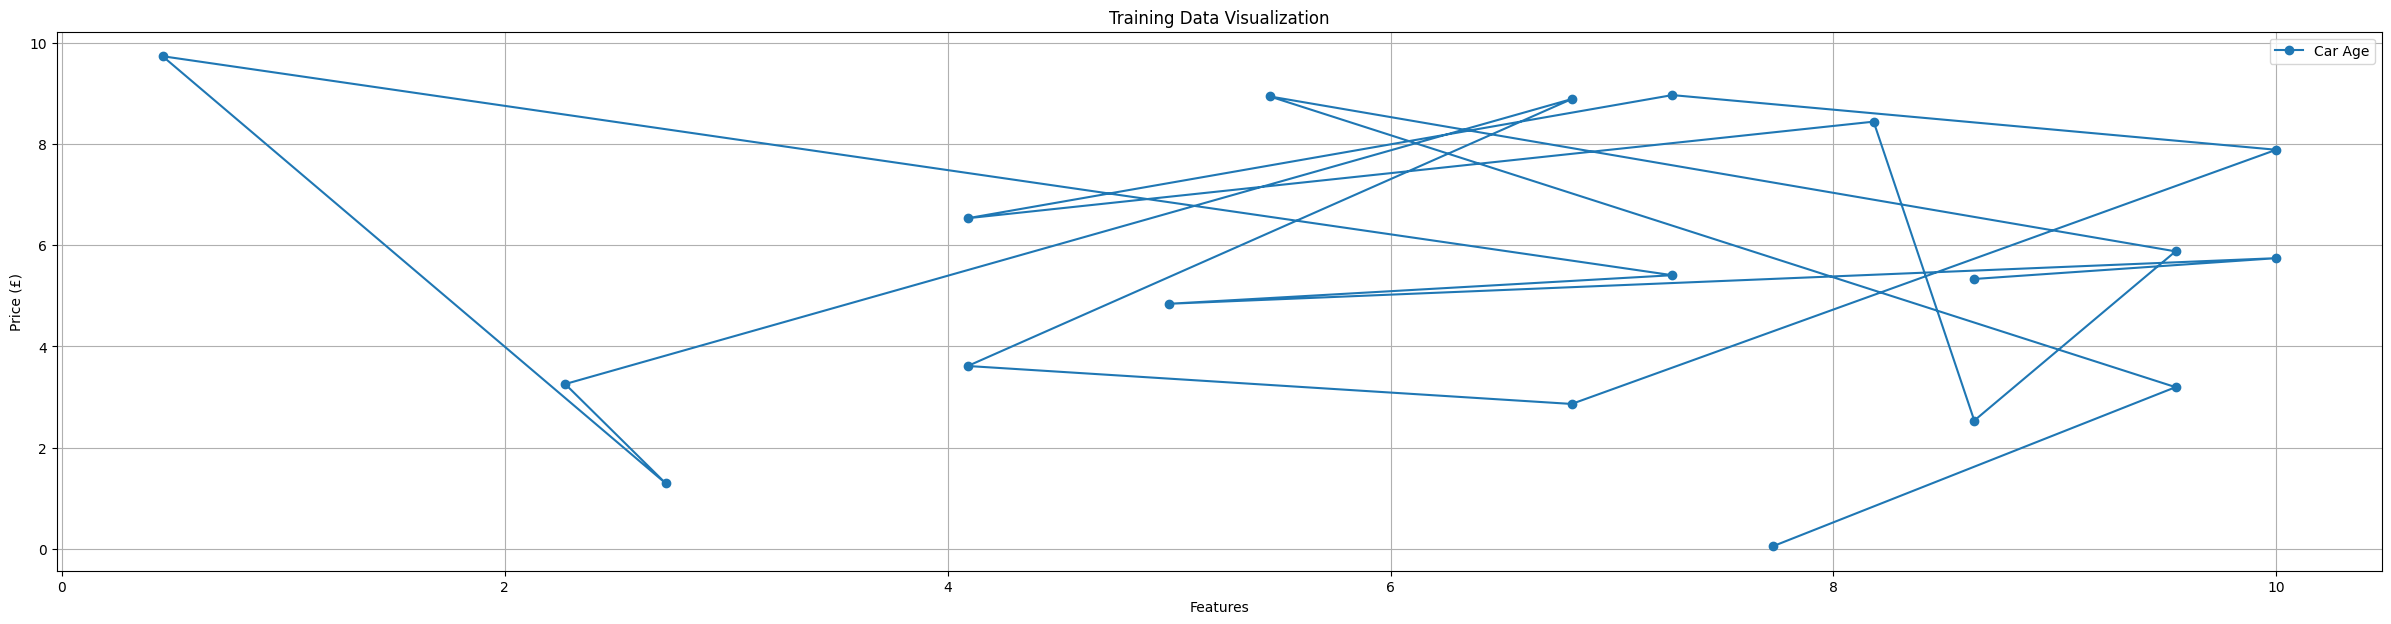

In [15]:
import matplotlib.pyplot as plt

# plot a graph of the training data
plt.figure(figsize=(30, 7))

for i in range(5,6):
    plt.plot(x_train.iloc[1:20, i], y_train[1:20], marker='o', label=x_train.columns[i])
plt.xlabel('Features')
plt.ylabel('Price (£)')
plt.title('Training Data Visualization')
plt.legend()
plt.grid()
plt.show()

In [16]:
input_layer = Input(shape=(x_train.shape[1],))
# hidden_layer_1 = Dense(128, activation='relu')(input_layer)
hidden_layer_2 = Dense(64, activation='relu')(input_layer)
hidden_layer_3 = Dense(32, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='linear')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','mae','accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0000e+00 - loss: 9.1455 - mae: 2.5833 - mse: 9.1455 - val_accuracy: 0.0000e+00 - val_loss: 8.7575 - val_mae: 2.5382 - val_mse: 8.7575
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0000e+00 - loss: 8.5966 - mae: 2.5251 - mse: 8.5966 - val_accuracy: 0.0000e+00 - val_loss: 8.5065 - val_mae: 2.5096 - val_mse: 8.5065
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0000e+00 - loss: 8.4965 - mae: 2.5175 - mse: 8.4965 - val_accuracy: 0.0000e+00 - val_loss: 8.6230 - val_mae: 2.5230 - val_mse: 8.6230
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0000e+00 - loss: 8.5029 - mae: 2.5165 - mse: 8.5029 - val_accuracy: 0.0000e+00 - val_loss: 8.3522 - val_mae: 2.4950 - val_mse: 8.3522
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0000e+00 - loss: 8.5342 - mae: 2.5181 - mse: 8.5342 - val_accuracy: 0.0000e+00 - val_loss: 8.4329 - val_mae: 2.5032 - val_ms

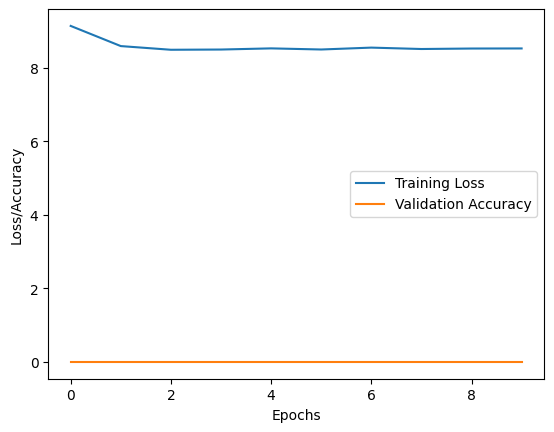

In [31]:
import matplotlib.pyplot as plt

plt.plot(training_history.history['loss'], label='Training Loss')
# plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.plot(training_history.history['accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Price (£): 4.7059155
Actual Price (£): 3.197208106287883
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━

Text(0, 0.5, 'Actual Price (£)')

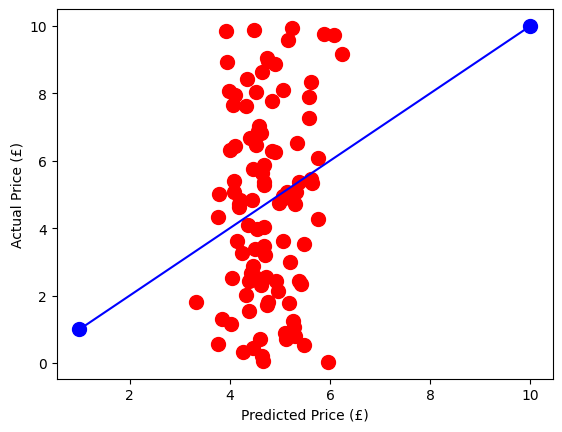

In [32]:
index = 18
pred = model.predict(x_train.iloc[[index]])
print("Predicted Price (£):", pred[0][0])
print("Actual Price (£):", y_train.iloc[index])

for i in range(0,100):
    pred = model.predict(x_train.iloc[[i]])
    plt.plot(pred[0][0], y_train.iloc[i], marker='o', markersize=10, color='red', label=i)

# plt.plot([pred[0][0]], [y_train.iloc[index]], marker='o', markersize=10, color='red', label='Predicted Price (£)')
plt.plot([1, 10], [1, 10], marker='o', markersize=10, color='blue', label='Actual Price (£)')
plt.xlabel('Predicted Price (£)')
plt.ylabel('Actual Price (£)')